In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Task 1

Logistic regression стремится поделить всё одной линией, поэтому надо сделать такой датасет, чтобы она могла это сделать. При этом надо запутать алгоритм knn, который смотрит на ближайшие соседние точки и по большинству определяет класс. 

Для достижения этих двух целей я расположила точки относительно предположительной линии разделения примерно так (точки = "х"):

.х.........х х....
_______________
х х.........х.......

creating dataset

In [0]:
coords1 = []

for i in range(0, 900, 10):
  coords1.append((i, i))
  
coords2 = []

for i in range(5, 905, 10):
  coords2.append((i, i))

In [0]:
dots1 = []

for i in coords1:
  dots1.append((i[0], i[1]+2))
  dots1.append((i[0]+1, i[1]-2))
  dots1.append((i[0]+2, i[1])) 

In [0]:
dots2 = []

for i in coords2:
  dots2.append((i[0], i[1]+2))
  dots2.append((i[0]+1, i[1]-2))
  dots2.append((i[0]-1, i[1])) 

In [0]:
dots = dots1 + dots2

In [0]:
df = pd.DataFrame(dots)

In [0]:
classes = []

for dot in dots:
  if dot[0]<dot[1]:
    classes.append(0)
  else:
    classes.append(1)

In [0]:
df['class'] = classes

In [362]:
df.head()

,0,1,class
0,0,2,0
1,1,-2,1
2,2,0,1
3,10,12,0
4,11,8,1


plot

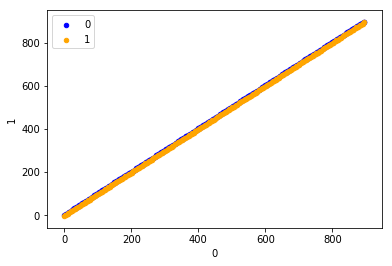

In [363]:
%matplotlib inline

ax = df[df['class'] == 0].plot.scatter(x=0, y=1, c='blue', label='0')
ax = df[df['class'] == 1].plot.scatter(x=0, y=1, c='orange', label='1', ax=ax)
ax

split dataset into: train, valid, test

In [0]:
X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**KNN**

tuning

In [376]:
classifier = KNeighborsClassifier()
classifier = GridSearchCV(classifier, {'n_neighbors': range(3,15), 
                                'weights':['uniform', 'distance']}, cv=5)
classifier.fit(X_train, y=y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**PREDICT on test_data** 

In [0]:
y_pred_knn = classifier.best_estimator_.predict(X_test)

In [378]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[34 41]
 [60 27]]
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        75
           1       0.40      0.31      0.35        87

    accuracy                           0.38       162
   macro avg       0.38      0.38      0.38       162
weighted avg       0.38      0.38      0.37       162



**LOGISTIC REGRESSION**

tuning

In [372]:
classifier = LogisticRegression() 
logreg = GridSearchCV(classifier, {'C': [1e-1, 1]}, cv=5)
logreg.fit(X_train, y=y_train)
    
logreg_prePred = logreg.best_estimator_.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

**PREDICT on test_data**

In [0]:
logreg_pred = logreg.best_estimator_.predict(X_test)

In [375]:
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

[[75  0]
 [80  7]]
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        75
           1       1.00      0.08      0.15        87

    accuracy                           0.51       162
   macro avg       0.74      0.54      0.40       162
weighted avg       0.76      0.51      0.38       162



**итог: ACCURACY LOGREG > ACCURACY KNN**

# Task 2

В этом пункте, наоборот, получается, данные должны быть распределены так, чтобы линией их делить было сложно, зато по окружению - легко. Как выглядят мои данные хорошо видно на рисунке ниже.

In [0]:
dataset = pd.read_csv('task2.csv', sep = ';', names = ['x', 'y', 'class'])

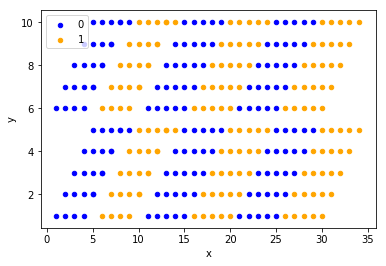

In [412]:
%matplotlib inline

ax = dataset[dataset['class'] == 0].plot.scatter(x='x', y='y', c='blue', label='0')
ax = dataset[dataset['class'] == 1].plot.scatter(x='x', y='y', c='orange', label='1', ax=ax)

ax

In [0]:
X = dataset.iloc[:, :2].values
y = dataset.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**KNN**

tuning

In [414]:
classifier = KNeighborsClassifier()
classifier = GridSearchCV(classifier, {'n_neighbors': range(3,15), 
                                'weights':['uniform', 'distance']}, cv=5)
classifier.fit(X_train, y=y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(3, 15),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

**PREDICT on test_data**

In [0]:
y_pred_knn = classifier.best_estimator_.predict(X_test)

In [416]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[40  6]
 [ 3 41]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        46
           1       0.87      0.93      0.90        44

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90



**LOGISTIC REGRESSION**

tuning

In [417]:
classifier = LogisticRegression() 
logreg = GridSearchCV(classifier, {'C': [1e-1, 1]}, cv=5)
logreg.fit(X_train, y=y_train)
    
logreg_prePred = logreg.best_estimator_.predict(X_valid)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

**PREDICT on test_data**

In [0]:
logreg_pred = logreg.best_estimator_.predict(X_test)

In [419]:
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

[[27 19]
 [13 31]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63        46
           1       0.62      0.70      0.66        44

    accuracy                           0.64        90
   macro avg       0.65      0.65      0.64        90
weighted avg       0.65      0.64      0.64        90



**итог: ACCURACY LOGREG < ACCURACY KNN**

# Task 3

Суть разница двух алгоритмов в том, что евклидова метрика высчитывает расстояние между точками в пространстве, в то время как косинусная близость смотрит на угол между векторами (начало координат - наша точка). 

Мои попытки расположить точки, так, чтобы косинусная близость победила Евклидово расстояние не удались :(

In [0]:
data = pd.read_csv('task3.csv', sep = ';', names = ['x', 'y', 'class'])

In [506]:
data.head()

,x,y,class
0,3.5,0.5,0
1,3.4,0.9,0
2,7.0,3.0,0
3,6.7,2.7,0
4,4.0,4.0,0


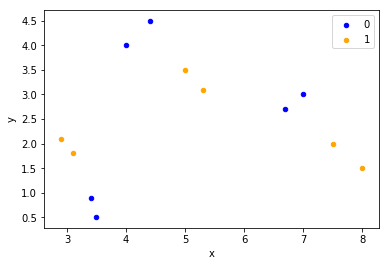

In [507]:
%matplotlib inline

ax = data[data['class'] == 0].plot.scatter(x='x', y='y', c='blue', label='0')
ax = data[data['class'] == 1].plot.scatter(x='x', y='y', c='orange', label='1', ax=ax)
#ax = data[data['class'] == 2].plot.scatter(x='x', y='y', c='green', label='2', ax=ax)
#ax = data[data['class'] == 3].plot.scatter(x='x', y='y', c='pink', label='3', ax=ax)
#ax = data[data['class'] == 4].plot.scatter(x='x', y='y', c='yellow', label='4', ax=ax)
ax

In [0]:
X = dataset.iloc[:, :2].values
y = dataset.iloc[:, 2].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [511]:
classifier = KNeighborsClassifier()
classifier = GridSearchCV(classifier, {'n_neighbors': range(3,15), 
                                'weights':['uniform', 'distance'], 'metric':['cosine']}, cv=5)
classifier.fit(X_train, y=y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['cosine'], 'n_neighbors': range(3, 15),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_pred_knn = classifier.best_estimator_.predict(X_test)

In [513]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[26 21]
 [14 29]]
              precision    recall  f1-score   support

           0       0.65      0.55      0.60        47
           1       0.58      0.67      0.62        43

    accuracy                           0.61        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.62      0.61      0.61        90



In [514]:
classifier = KNeighborsClassifier()
classifier = GridSearchCV(classifier, {'n_neighbors': range(3,15), 
                                'weights':['uniform', 'distance'], 'metric':['euclidean']}, cv=5)
classifier.fit(X_train, y=y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean'], 'n_neighbors': range(3, 15),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_pred_knn = classifier.best_estimator_.predict(X_test)

In [516]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[44  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.93      0.95      0.94        43

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.94      0.94      0.94        90

